In [1]:
import numpy as np
from sklearn import svm
import pandas as pd

In [2]:
ps = {
    "kernel": "rbf",
    "C": 1.0,
    "gamma": "scale"
}

In [3]:
clf = svm.SVC()

In [4]:
class Dataset:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.x_train = X
        self.y_train = y
        self.x_test = X
        self.y_test = y        
    
    def split(self, percentage):
        idx = np.arange(len(self.X))
        np.random.shuffle(idx)
        
        sX = self.X[idx]
        sy = self.y[idx]
        
        n_train = int(len(self.X) * percentage)
        self.x_train = sX[:n_train]
        self.y_train = sy[:n_train]
        self.x_test = sX[n_train:]
        self.y_test = sy[n_train:]
    
    def __len__(self):
        return len(self.y)
    
    def __repr__(self):
        cls = self.__class__.__name__
        n = len(self.y)
        num_features = self.X.shape[1]
        return f'{cls}(samples={n}, features={num_features})'

In [5]:
class Learner:
    def __init__(self, name, model, param):
        self.name = name
        self.model = model
        self.params = param
        self.data = None
    
    def load_data(self, X, y):
        self.data = Dataset(X, y)
    
    def train_model(self):
        if self.data == None:
            print("Dataset has not been set.")
        else:
            self.model.fit(self.data.x_train, self.data.y_train)            
    
    def eval_model(self):
        pass
    
    def __repr__(self):
        cls = self.__class__.__name__
        return f'{cls}(model={self.name!r})'

In [170]:
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([0, 0, 1, 1])

In [6]:
df = pd.read_csv("iris.csv")

In [7]:
feat = ["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]
targ = "species"

In [8]:
# df.species = pd.Categorical(df.species)
df[['classes']] = df[[targ]].apply(lambda col:pd.Categorical(col).codes)


In [355]:
cc = {0:"c1", 1:"c2", 2:"c3"}

In [ ]:
feat = "sepal_length"
groups = df[[feat, targ]].groupby([targ])
values = []
classes = []
for name, value in groups:
    values.append(value[feat].tolist())
    classes.append(name[0])

In [205]:
df["classes"].to_numpy().ravel().shape

(150,)

In [206]:
df['classes'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [207]:
X = df.iloc[:, 0:-2].copy().to_numpy()
y = df.iloc[:,-1].copy().to_numpy()

In [208]:
d = Dataset(X, y)

In [209]:
d.split(0.8)

In [210]:
l = Learner("SVM", clf, [])

In [211]:
l.load_data(X,y)

In [212]:
l.train_model()

In [213]:
l.model.predict(d.x_test)

array([2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 0, 0], dtype=int8)

In [244]:
np.array([[1, 2], [3, 4], [5, 6]]).shape

(3, 2)

In [142]:
import learner_module
import pandas as pd

In [143]:
l = learner_module.classification_algorithms

In [146]:
l.keys()

dict_keys(['LR', 'DTC', 'RFC', 'GBC', 'KNN', 'LSVM', 'Q-SVM', 'C-SVM', 'RBF-SVM', 'GNB', 'MNB', 'MLP', 'KMC', 'GMM'])

In [ ]:
for k,v in learner_module.classification_algorithms.items():
    print(v)

In [6]:
df = pd.DataFrame.from_dict(learner_module.classification_algorithms)

In [8]:
df.T

,long_name,function,parameters
LR,Logistic Regression,<class 'sklearn.linear_model._logistic.Logisti...,"[penalty, C, solver, max_iter]"
DTC,Decision Tree Classifier,<class 'sklearn.tree._classes.DecisionTreeClas...,"[criterion, max_depth, min_samples_split, min_..."
RFC,Random Forest Classifier,<class 'sklearn.ensemble._forest.RandomForestC...,"[n_estimators, criterion, max_depth, min_sampl..."
GBC,Gradient Boosting Classifier,<class 'sklearn.ensemble._gb.GradientBoostingC...,"[n_estimators, learning_rate, max_depth, subsa..."
KNN,K-Nearest Neighbors Classifier,<class 'sklearn.neighbors._classification.KNei...,"[n_neighbors, weights, algorithm, p]"
LSVM,Linear Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='linear', C, max_iter]"
Q-SVM,Quadratic Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='poly', degree=2, C, gamma]"
C-SVM,Cubic Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='poly', degree=3, C, gamma]"
RBF-SVM,Radial Basis Function Support Vector Machine,<class 'sklearn.svm._classes.SVC'>,"[kernel='rbf', C, gamma]"
GNB,Gaussian Naive Bayes,<class 'sklearn.naive_bayes.GaussianNB'>,[var_smoothing]


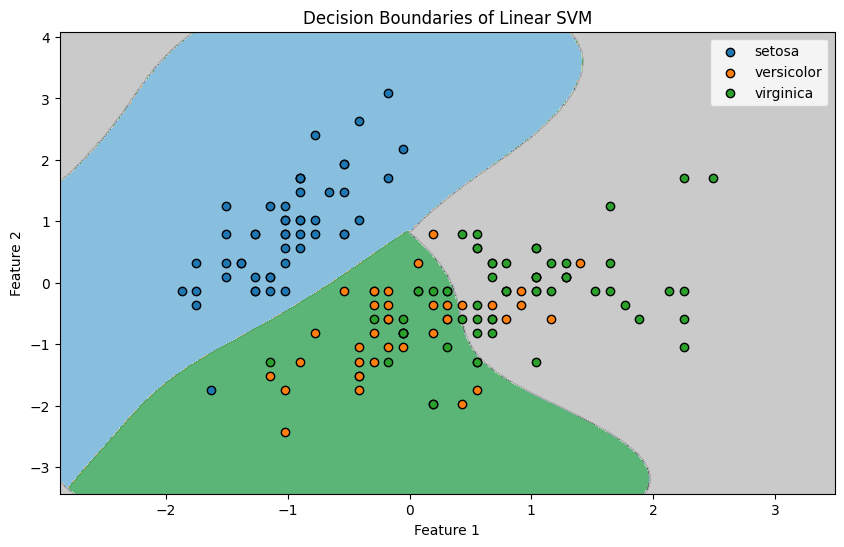

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def plot_decision_boundaries(model, X, y, feature_idx, class_names):
    # Select the two features for visualization
    X_selected = X[:, feature_idx]
    
    # Standardize the selected features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Create a mesh grid
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict class probabilities for the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.tab20c)

    # Scatter plot of the original data
    for class_value, class_name in enumerate(class_names):
        plt.scatter(
            X_scaled[y == class_value, 0],
            X_scaled[y == class_value, 1],
            label=class_name,
            edgecolor="k"
        )

    plt.xlabel(f"Feature {feature_idx[0] + 1}")
    plt.ylabel(f"Feature {feature_idx[1] + 1}")
    plt.title("Decision Boundaries of Linear SVM")
    plt.legend()
    plt.show()

# Example usage
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # All 4 features
y = iris.target  # Target labels
class_names = iris.target_names

# Train a Linear SVM model on two selected features (e.g., feature 0 and 1)
features_to_visualize = [0, 1]
X_selected_features = X[:, features_to_visualize]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_features)

svm_model = SVC(kernel="rbf")
svm_model.fit(X_scaled, y)

# Plot decision boundaries
plot_decision_boundaries(svm_model, X, y, features_to_visualize, class_names)


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
     go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        colorscale='Electric',
    ))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import sklearn.datasets as db
import numpy as np
ks = ["data", "target", "feature_names", "target_names"]

In [307]:
d = db.load_iris()
data = d["data"]
target = d["target"]
fnames = d["feature_names"]
cls = d["target_names"]

In [308]:
cls

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

def get_dataset_df(dataset_loader):
    dataset = dataset_loader()
    X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
    y = pd.Series(dataset['target'], name='target')
    target_names = {index: name for index, name in enumerate(dataset['target_names'])}
    y = y.map(target_names)
    df = pd.concat([X, y], axis=1)
    return df


In [313]:
target_names = {index: name for index, name in enumerate(cls)}
y = pd.Series(d['target'], name='target')
y = y.map(target_names)

In [318]:
load_sklearn_dataset_as_dataframe(db.load_digits)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


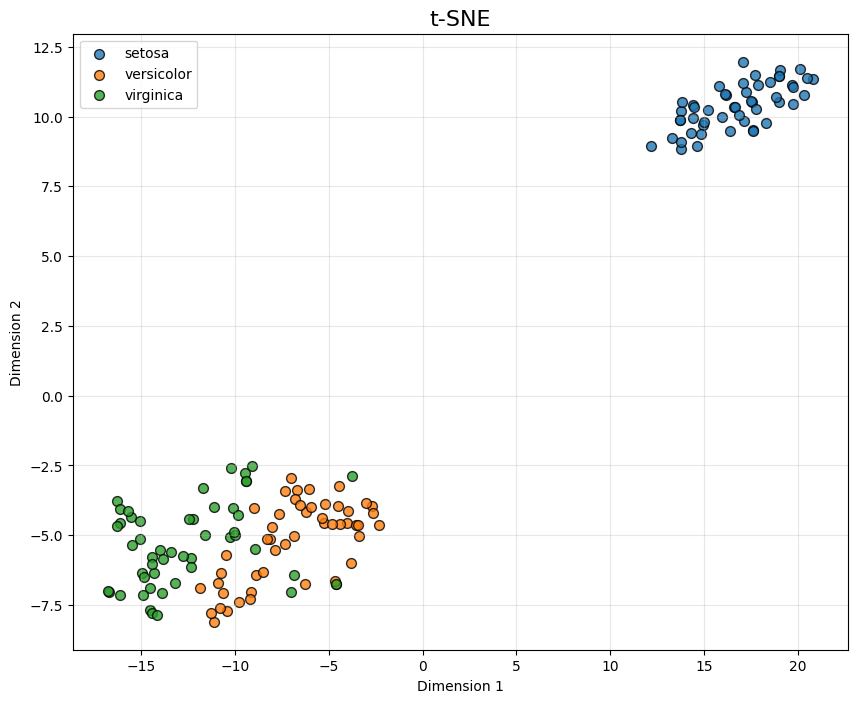

In [335]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels
class_names = iris.target_names  # Class names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
            max_iter=1000, random_state=32)
X_embedded = tsne.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
for class_value, class_name in enumerate(class_names):
    plt.scatter(X_embedded[y == class_value, 0], X_embedded[y == class_value, 1],
                label=class_name, s=50, alpha=0.8, edgecolor='k')

plt.title("t-SNE", fontsize=16)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [337]:
X_embedded[y == class_value, 0]

array([-14.534717 ,  -9.404221 , -15.019741 , -11.604331 , -13.418297 ,
       -16.106277 ,  -3.7375455, -15.501089 , -11.695853 , -16.113499 ,
       -13.181905 , -11.118692 , -13.953516 ,  -9.106201 , -10.196881 ,
       -13.881846 , -12.301099 , -16.68596  , -16.28009  ,  -4.587057 ,
       -14.913196 ,  -9.448115 , -16.126593 , -10.104961 , -14.48896  ,
       -15.470575 ,  -9.814016 , -10.24468  , -12.196649 , -15.050588 ,
       -15.663445 , -16.74694  , -12.408738 ,  -8.93572  ,  -6.829149 ,
       -16.248476 , -14.4035   , -12.326345 ,  -9.970478 , -14.410522 ,
       -14.273142 , -14.413867 ,  -9.404221 , -14.831743 , -14.89214  ,
       -13.83382  ,  -6.9994316, -12.770849 , -14.140002 , -10.02691  ],
      dtype=float32)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def tsne_to_dataframe_with_labels(df, feature_columns, target_column, target_names):
    X = df[feature_columns].values
    y = df[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
                max_iter=1000, random_state=76)
    X_embedded = tsne.fit_transform(X_scaled)

    target_class_names = y.map({i: name for i, name in enumerate(target_names)})

    tsne_df = pd.DataFrame(X_embedded, columns=['t-SNE1', 't-SNE2'])
    tsne_df['target'] = target_class_names 

    return tsne_df

# Example usage with Iris dataset
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Perform t-SNE and get the DataFrame
tsne_result_df = tsne_to_dataframe_with_labels(
    iris_df,
    feature_columns=iris.feature_names,
    target_column='target',
    target_names=iris.target_names
)

# Plot with Seaborn
# plt.figure(figsize=(10, 8))
# sns.scatterplot(data=tsne_result_df, x='t-SNE1', y='t-SNE2', hue='target_name', palette='viridis', s=100)
# plt.title("t-SNE Visualization with Target Class Names", fontsize=16)
# plt.show()



In [348]:
tsne_result_df

,t-SNE1,t-SNE2,target
0,17.524487,10.526419,setosa
1,13.745171,10.214914,setosa
2,14.959588,9.684340,setosa
3,14.277590,9.399287,setosa
4,17.879566,11.128079,setosa
...,...,...,...
145,-13.833820,-5.847079,virginica
146,-6.999432,-7.042307,virginica
147,-12.770849,-5.746600,virginica
148,-14.140002,-7.868678,virginica
